# Process and Fields

In [1]:
import openturns as ot

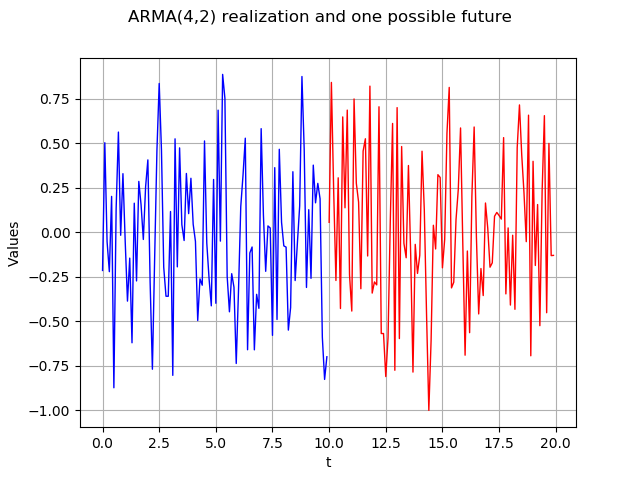

In [2]:
# ARMA
myTG = ot.RegularGrid(0.0, 0.1, 100)
myWN = ot.WhiteNoise(ot.Triangular(-1.0, 0.0, 1.0), myTG)
myARCoef = ot.ARMACoefficients([0.4, 0.3, 0.2, 0.1])
myMACoef = ot.ARMACoefficients([0.4, 0.3])
myARMA = ot.ARMA(myARCoef, myMACoef, myWN)
real = myARMA.getRealization()
graph = real.drawMarginal(0)
futur = myARMA.getFuture(100, 1)
graphFut = futur.drawMarginal(0)
graphFut
graph.setTitle('ARMA(4,2) realization and one possible future')
graph.add(graphFut)
graph

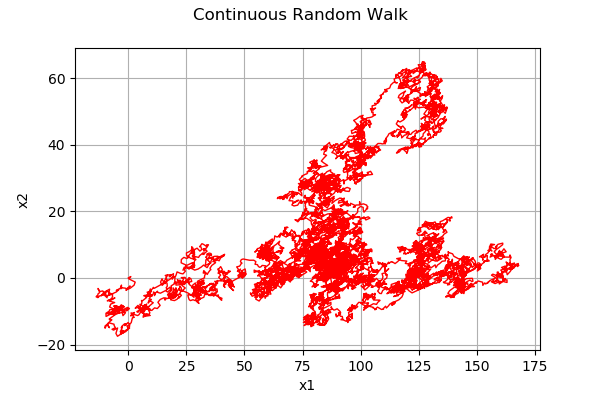

In [3]:
# Cont RandomWalk
myTG = ot.RegularGrid(0, 0.1, 10000)
myDist = ot.ComposedDistribution([ot.Normal(), ot.Uniform(-1.0, 1.0)], ot.ClaytonCopula(0.5))
myOrigin = myDist.getMean()
myRW = ot.RandomWalk(myOrigin, myDist, myTG)
field = myRW.getRealization()
graph = field.draw()
graph.setTitle('Continuous Random Walk')
graph.setXTitle('x1')
graph.setYTitle('x2')
graph.setColors(['red'])
graph


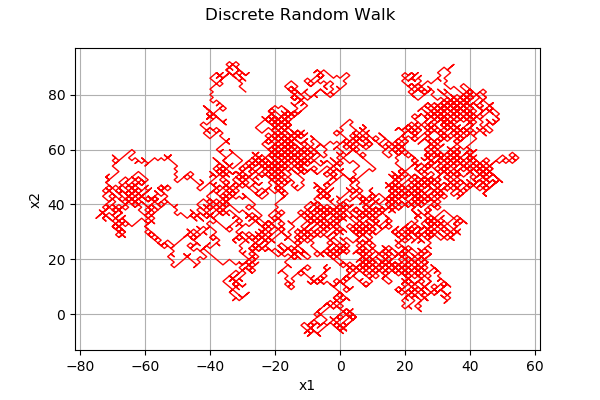

In [4]:
# Discrete RandomWalk
myTG = ot.RegularGrid(0, 0.1, 10000)
myDist = ot.ComposedDistribution([ot.Bernoulli(0.5)*2-1]*2)
myOrigin = [0]*2
myRW = ot.RandomWalk(myOrigin, myDist, myTG)
field = myRW.getRealization()
graph = field.draw()
graph.setTitle('Discrete Random Walk')
graph.setXTitle('x1')
graph.setYTitle('x2')
graph.setColors(['red'])
graph


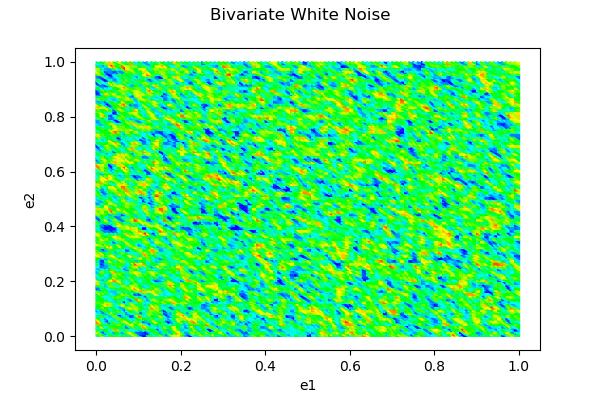

In [5]:
# Whitenoise
myDist = ot.Uniform(-1.0, 1.0)
myMesh = ot.IntervalMesher([100]*2).build(ot.Interval([0.0]*2, [1.0]*2))
myWN = ot.WhiteNoise(myDist, myMesh)

myReal = myWN.getRealization()
graph = myReal.draw()
graph.setTitle('Bivariate White Noise')
graph.setXTitle('e1')
graph.setYTitle('e2')
graph

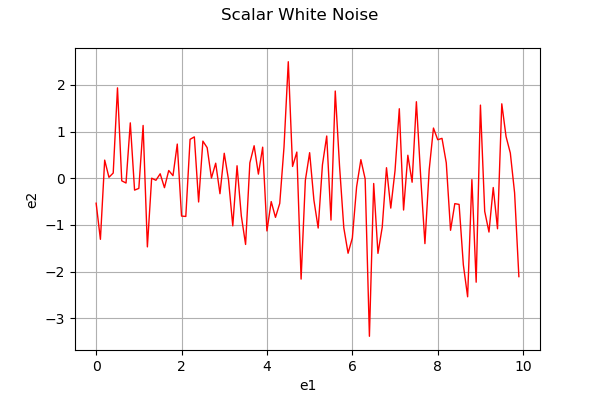

In [6]:
myDist = ot.Normal()
myMesh = ot.RegularGrid(0, 0.1, 100)
myWN = ot.WhiteNoise(myDist, myMesh)

myReal = myWN.getRealization()
graph = myReal.drawMarginal(0)
graph.setTitle('Scalar White Noise')
graph.setXTitle('e1')
graph.setYTitle('e2')
graph.setColors(['red'])
graph

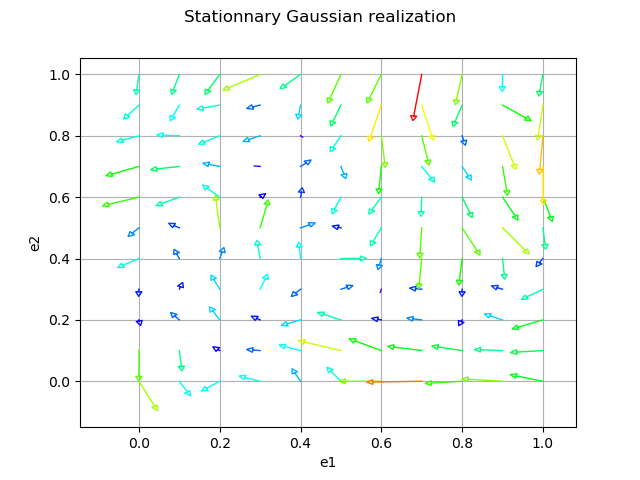

In [2]:
# Processus gaussien stationnaire def par sa fct de cov
ot.ResourceMap.SetAsScalar("Field-ArrowRatio", 0.015)
ot.ResourceMap.SetAsScalar("Field-ArrowScaling", 0.075)

amplitude = [1.0]*2
scale = [1.0]*2
myCov = ot.ExponentialModel(scale, amplitude)
myMesh = ot.IntervalMesher([10]*2).build(ot.Interval([0.0]*2, [1.0]*2))
myProcess = ot.GaussianProcess(myCov, myMesh)

#realCont = myProcess.getContinuousRealization()
realDisc = myProcess.getRealization()
graph = realDisc.draw()

graph.setTitle('Stationnary Gaussian realization')
graph.setXTitle('e1')
graph.setYTitle('e2')
graph

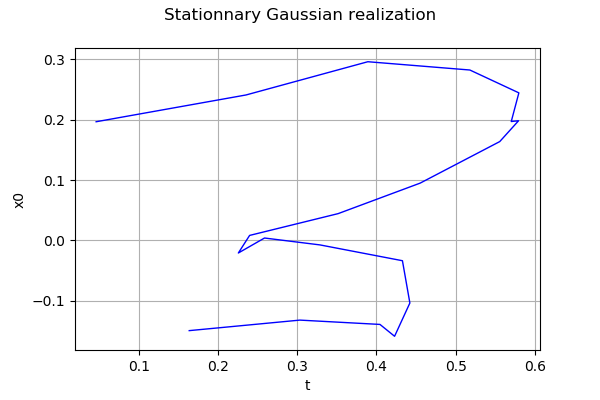

In [8]:
# Processus gaussien stationnaire def par sa dsp
amplitude = [1.0]*2
scale = [1.0]*2
myDSP = ot.CauchyModel(amplitude, scale)
myTG = ot.RegularGrid(0.0, 0.1, 20)
myProcess = ot.SpectralGaussianProcess(myDSP, myTG)

#realCont = myProcess.getContinuousRealization()
realDisc = myProcess.getRealization()
graph = realDisc.draw()
graph.setTitle('Stationnary Gaussian realization')
graph

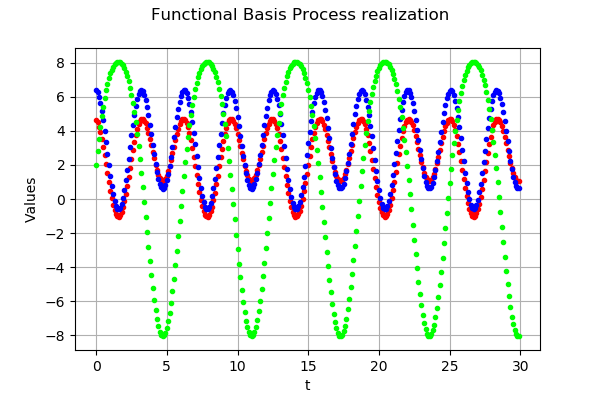

In [9]:
# Functionalbasisprocess

f1 = ot.SymbolicFunction(['t'], ['sin(t)'])
f2 = ot.SymbolicFunction(['t'], ['cos(t)*cos(t)'])
myBasis = ot.Basis([f1, f2])
coefDis = ot.Normal([2]*2, [5]*2, ot.CorrelationMatrix(2))
myTG = ot.RegularGrid(0.0, 0.1,300)

myFBP = ot.FunctionalBasisProcess(coefDis , myBasis, myTG)

TS = myFBP.getRealization()
graph = TS.draw()
graph.add(myFBP.getRealization().draw())
graph.add(myFBP.getRealization().draw())
graph.setColors(['red','blue', 'green'])
graph.setTitle('Functional Basis Process realization')
graph

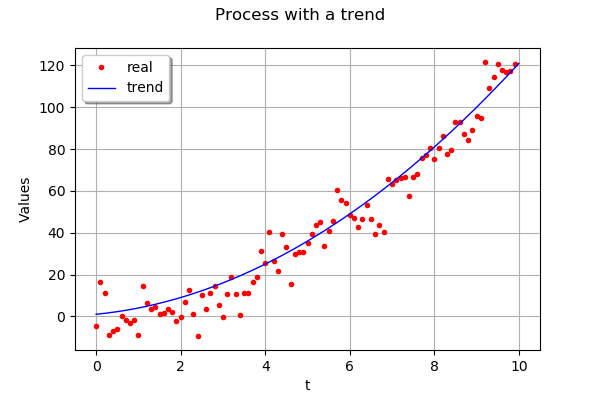

In [10]:
# Composite process: Ajout tendance
f = ot.SymbolicFunction(['t'], ['1+2*t+t^2'])
myGrid = ot.RegularGrid(0.0, 0.1, 100)
fTrend = ot.TrendTransform(f, myGrid)
amplitude=[10.0]
scale=[0.2]
myCovModel=ot.ExponentialModel(scale, amplitude)
myXProcess=ot.GaussianProcess(myCovModel, myGrid)

myYProcess = ot.CompositeProcess(fTrend, myXProcess)
myField = myYProcess.getRealization()
myStatField = fTrend.getInverse()(myField)

graph = myField.draw()
graph.add(f.draw(0, 10))

#graph.add(myStatField.draw())
graph.setColors(['red', 'blue'])
graph.setLegends(['real', 'trend'])
graph.setLegendPosition('topleft')
graph.setTitle('Process with a trend')
graph

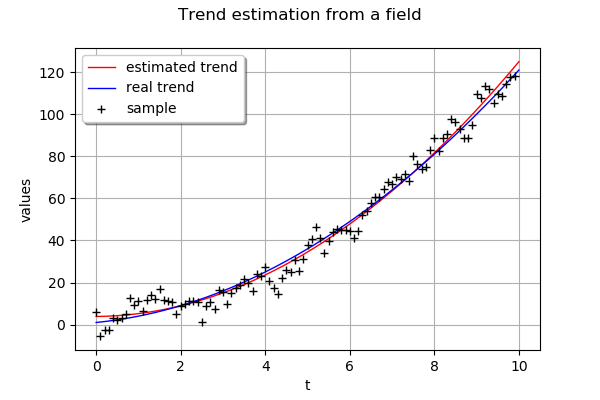

In [11]:
# Estimation tendance
myGrid = ot.RegularGrid(0.0, 0.1, 100)

amplitude = [5.0]
scale = [0.2]
myCovModel = ot.ExponentialModel(scale, amplitude)
myXProcess = ot.GaussianProcess(myCovModel, myGrid)

# Create a trend
fTrend = ot.SymbolicFunction(['t'], ['1+2*t+t^2'])
fTemp = ot.TrendTransform(fTrend, myGrid)

# Add the trend to the process and get a field
myYProcess = ot.CompositeProcess(fTemp, myXProcess)
myYField = myYProcess.getRealization()

# Create a TrendFactory
myBasisSequenceFactory = ot.LARS()
myFittingAlgorithm = ot.KFold()
func1 = ot.SymbolicFunction(['t'], ['1'])
func2 = ot.SymbolicFunction(['t'], ['t'])
func3 = ot.SymbolicFunction(['t'], ['t^2'])
myBasis = ot.Basis([func1, func2, func3])

myTrendFactory = ot.TrendFactory(myBasisSequenceFactory, myFittingAlgorithm)

# Estimate the trend
myTrendTransform = myTrendFactory.build(myYField, myBasis)

ftrend = ot.ParametricFunction(myTrendTransform.getFunction(), [1], [0.0])
graph = ftrend.draw(0.0, 10)
graph.add(fTrend.draw(0.0, 10))
graph.add(ot.Cloud(myYField.getMesh().getVertices(), myYField.getValues()))
graph.setColors(['red', 'blue', 'black'])
graph.setLegends(['estimated trend', 'real trend', 'sample'])
graph.setLegendPosition('topleft')
graph.setYTitle('values')
graph.setTitle('Trend estimation from a field')
graph

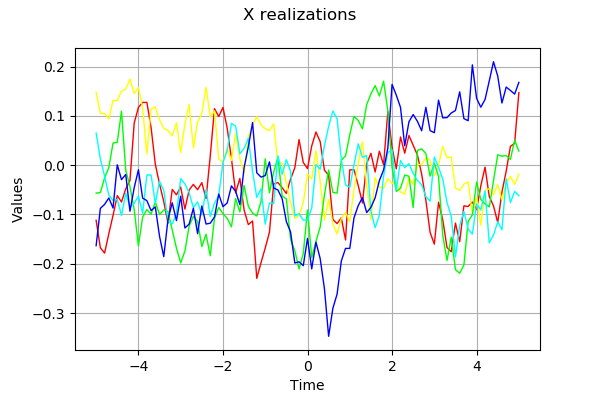

In [12]:
# Composite process: Y=g(X)
# qui bouge les grilles et les valeurs
class GaussianConvolution(ot.OpenTURNSPythonFieldFunction):
    def __init__(self, mesh):
        super(GaussianConvolution, self).__init__(mesh, 1, mesh, 1)
        self.setInputDescription(["x"])
        self.setOutputDescription(["y"])
        self.outputGrid_ = ot.RegularGrid(-1.0, 0.02, 101)
        self.algo_ = ot.GaussKronrod(20, 1.0e-4, ot.GaussKronrodRule(ot.GaussKronrodRule.G7K15))
        
    def _exec(self, X):
        mesh = self.getInputMesh()
        inputValues = self.getInputMesh().getValues()
        f = ot.Function(ot.PiecewiseLinearEvaluation([x[0] for x in mesh.getVertices()], inputValues))
        outputValues = ot.Sample(0, 1)
        for t in self.outputGrid_.getVertices():
            kernel = ot.Normal(t[0], 0.05)
            def pdf(X):
                return [kernel.computePDF(X)]
            weight = ot.Function(ot.PythonFunction(1, 1, pdf))
            outputValues.add(self.algo_.integrate(weight * f, kernel.getRange()))
        return outputValues

N = 5
mesh = ot.RegularGrid(-5.0, 0.1, 101)
X = ot.GaussianProcess(ot.GeneralizedExponential([1.0], [0.1], 1), mesh)

f = ot.FieldFunction(GaussianConvolution(mesh))
Y = ot.CompositeProcess(f, X)

x_graph = X.getSample(N).drawMarginal(0)
x_graph.setTitle('X realizations')
y_graph = Y.getSample(N).drawMarginal(0)
y_graph.setTitle('Y realizations')
x_graph


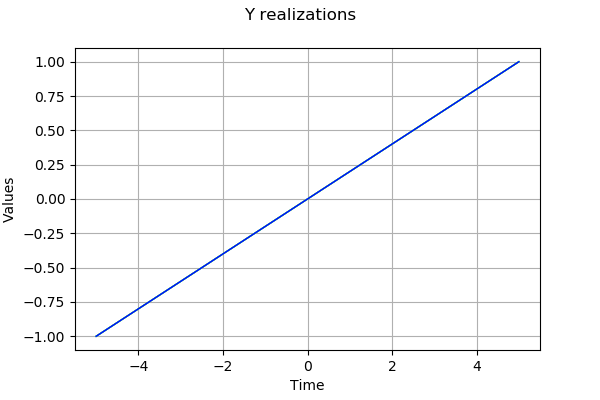

In [13]:
y_graph

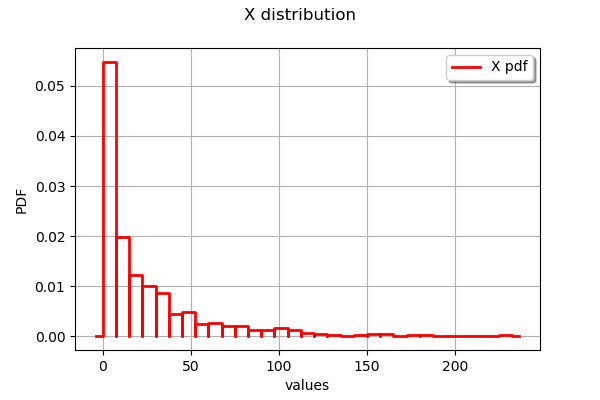

In [14]:
# Composite process: Y=BoxCox(X)

myCovModel = ot.ExponentialModel([0.2], [5.0])
myGrid = ot.RegularGrid(0.0, 0.1, 1000)
myXProcess = ot.GaussianProcess(myCovModel, myGrid)

f = ot.SymbolicFunction('t', 't^2')
myX = ot.CompositeProcess(ot.ValueFunction(f, myGrid), myXProcess)


myReal = myX.getRealization()

hist = ot.HistogramFactory().build(myReal.getValues())
graph = hist.drawPDF()
graph.setTitle('X distribution')
graph.setLegends(['X pdf'])
graph.setXTitle('values')
graph


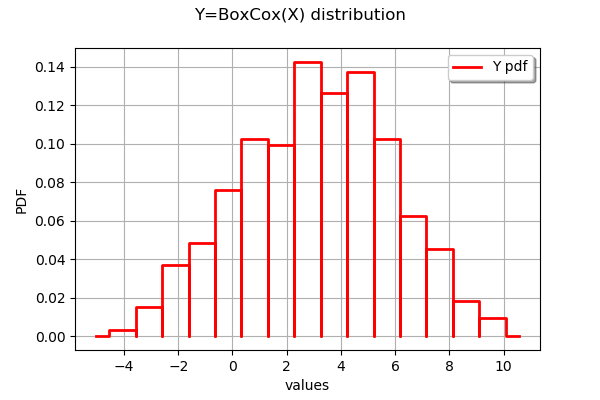

In [15]:

likeliHoodGraph = ot.Graph()
myBXTrans = ot.BoxCoxFactory().build(myReal, [0], likeliHoodGraph)
myNewReal = myBXTrans(myReal)
newHist = ot.HistogramFactory().build(myNewReal.getValues())
graph2 = newHist.drawPDF()
graph2.setTitle('Y=BoxCox(X) distribution')
graph2.setLegends(['Y pdf'])
graph2.setXTitle('values')
graph2


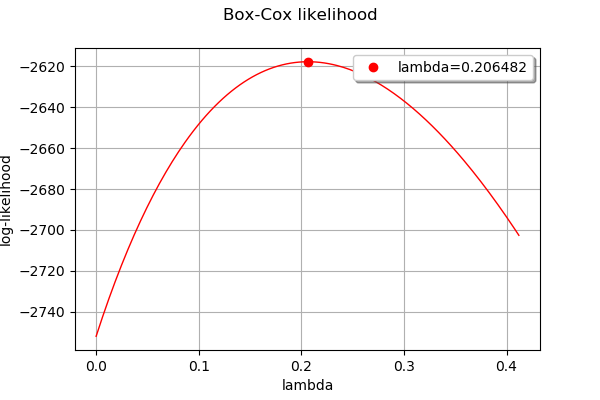

In [16]:
likeliHoodGraph